In [1]:
from Stable_SSM_EM import *
import numpy as np
import pandas as pd
from Utilities import *
from ModelTest import loadTestSets

In [2]:
colors = 2*[c["color"] for c in plt.rcParams["axes.prop_cycle"]]

## Load Feather data

In [3]:
# Info on what's available
feather_wsns = ["ktl", "grzl"]

# Choose a network
df_feather_ktl = pd.read_csv("../output/feather/%s.csv" % feather_wsns[0])
times = pd.to_datetime(df_feather_ktl["time"])

# Extract values
y_sd_raw = df_feather_ktl[["snowdepth_%i" % s for s in range(1, 12)]].values
y_t_raw = df_feather_ktl[["air_temp_%i" % s for s in range(1, 12)]].values
y_rh_raw = df_feather_ktl[["rel_humidity_%i" % s for s in range(1, 12)]].values

In [8]:
n_LF = 2
n_sensors = 2
max_it = 400

ti, tf = 10001, 10101
Y = y_sd_raw[ti:tf, 0:n_sensors].T

# Set controls
U = np.zeros([1, tf-ti])
V = np.ones([1, tf-ti])

X_hat, sigma_smooth, sigma_filt, A, B, C, D, Q, R, pi0, sigma0 = ssm_em_stable(Y, U, V, n_LF, max_it)

Y_hat = np.dot(C, X_hat) + np.dot(D, V)

(0, 100)

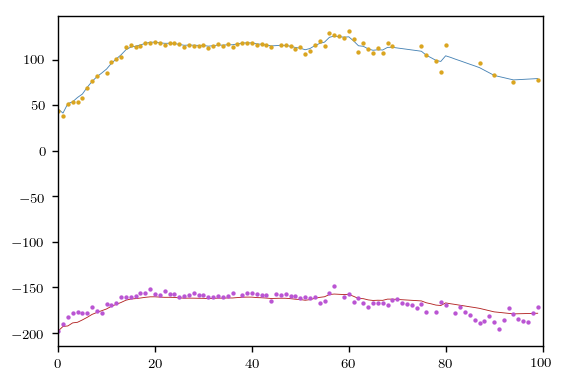

In [9]:
for s in range(n_sensors):
    plt.plot(Y_hat[s, :], '-', linewidth=0.5)
for s in range(n_sensors):
    plt.plot(Y[s, :], '.', markersize=3.0)
    
plt.xlim(0, tf-ti)

In [14]:
D

array([[-333.18621265],
       [-365.4513251 ]])

In [50]:
C, X_PCA, Y_PCA = pca_est_MD(Y, n_LF, max_it=50)

(0, 100)

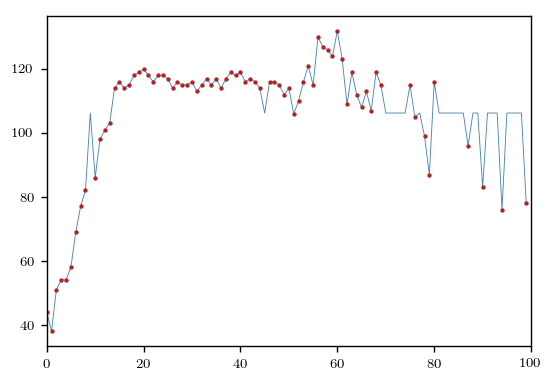

In [51]:
for s in range(n_sensors):
    plt.plot(Y_PCA[s, :], '-', linewidth=0.5)
for s in range(n_sensors):
    plt.plot(Y[s, :], '.', markersize=3.0)
    
plt.xlim(0, tf-ti)

In [34]:
A, B, D, Q, R, pi0, sigma0 = ssm_setup(Y_PCA, U, V, C, X_PCA, n_LF)